In [1]:
import numpy as np
from tqdm import tqdm
import anndata as ad
import sys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.io import savemat, loadmat
import os
import pandas as pd

In [2]:
data_folder = 'data/thomsonlab_signaling/'
large_data_folder = 'large_data/thomsonlab_signaling/'
fig_folder = 'figure/thomsonlab_signaling/'

In [3]:
cadata = ad.read_h5ad(large_data_folder + 'thomsonlab_signaling_filtered_2500_scvi_umap.h5ad')

/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
seed = 0
num_spin = 20
num_pool = num_spin
num_repeat = 10
task_name = 'thomsonlab_signaling'
save_path = "./test/test_signalling/"

## Test with DSPIN Class

In [5]:
from util.dspin import DSPIN

In [8]:
# Reload the Package
from importlib import reload
import util.dspin  
reload(util.dspin)  
from util.dspin import DSPIN 

In [6]:
a = DSPIN(cadata, save_path, num_spin)

/Users/ygong/git/DSPIN-abstract/util/dspin.py:75: UserWarning: num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.
  warnings.warn("num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.")


100%|██████████| 24/24 [00:00<00:00, 59.13it/s]


Pre-computing
Round_1


Iteration Progress: 100%|██████████| 500/500 [01:59<00:00,  4.17it/s, Reconstruction Error=7127.64]


Round_2


Iteration Progress: 100%|██████████| 500/500 [02:11<00:00,  3.79it/s, Reconstruction Error=7640.20]


Round_3


Iteration Progress: 100%|██████████| 500/500 [02:24<00:00,  3.47it/s, Reconstruction Error=7642.77]


Round_4


Iteration Progress: 100%|██████████| 500/500 [02:23<00:00,  3.47it/s, Reconstruction Error=7667.71]


Round_5


Iteration Progress: 100%|██████████| 500/500 [02:21<00:00,  3.53it/s, Reconstruction Error=7679.47]


Round_6


Iteration Progress: 100%|██████████| 500/500 [02:40<00:00,  3.11it/s, Reconstruction Error=7686.10]


Round_7


Iteration Progress: 100%|██████████| 500/500 [02:32<00:00,  3.28it/s, Reconstruction Error=7676.25]


Round_8


Iteration Progress: 100%|██████████| 500/500 [02:21<00:00,  3.55it/s, Reconstruction Error=7676.85]


Round_9


Iteration Progress: 100%|██████████| 500/500 [02:11<00:00,  3.79it/s, Reconstruction Error=7679.04]


Round_10


Iteration Progress: 100%|██████████| 500/500 [02:21<00:00,  3.53it/s, Reconstruction Error=7686.29]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


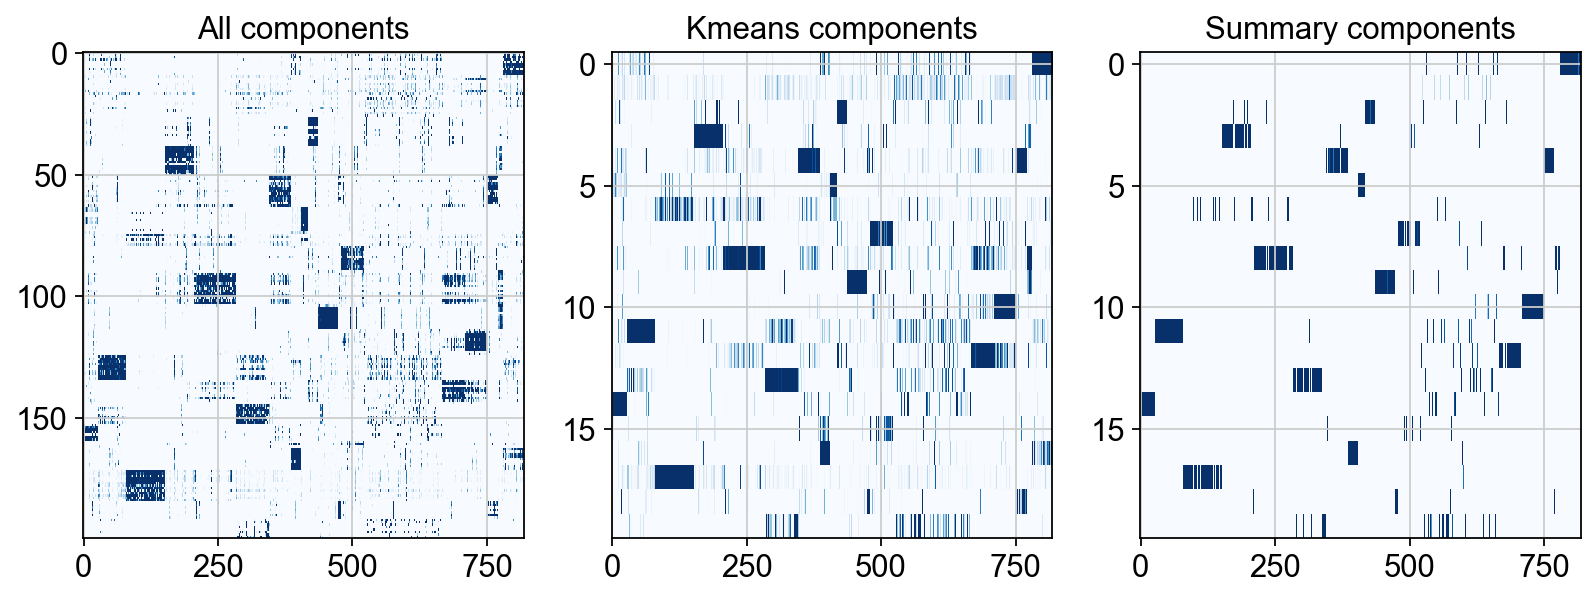

In [7]:
a.gene_program_discovery()

In [10]:
example_list = ['TNFA_200ng_mL_1-COVID-1', 'IL7_50ng_mL_1-COVID-1', 'LPS_50ng_mL_1-COVID-1', 'CCL2_200ng_mL_1-COVID-1', 'CONTROL_1-COVID-1']

100%|██████████| 20/20 [00:02<00:00,  6.98it/s]


Progress: 13, Network gradient: 17.714643
Progress: 20, Network gradient: 8.396566
Progress: 26, Network gradient: 4.920546
Progress: 33, Network gradient: 3.778511
Progress: 40, Network gradient: 2.137222
Progress: 46, Network gradient: 2.063983
Progress: 53, Network gradient: 1.425371
Progress: 60, Network gradient: 1.411813
Progress: 66, Network gradient: 1.161010
Progress: 73, Network gradient: 1.697669
Progress: 80, Network gradient: 1.841309
Progress: 86, Network gradient: 0.837351
Progress: 93, Network gradient: 2.724120
Halting due to three backtracks.


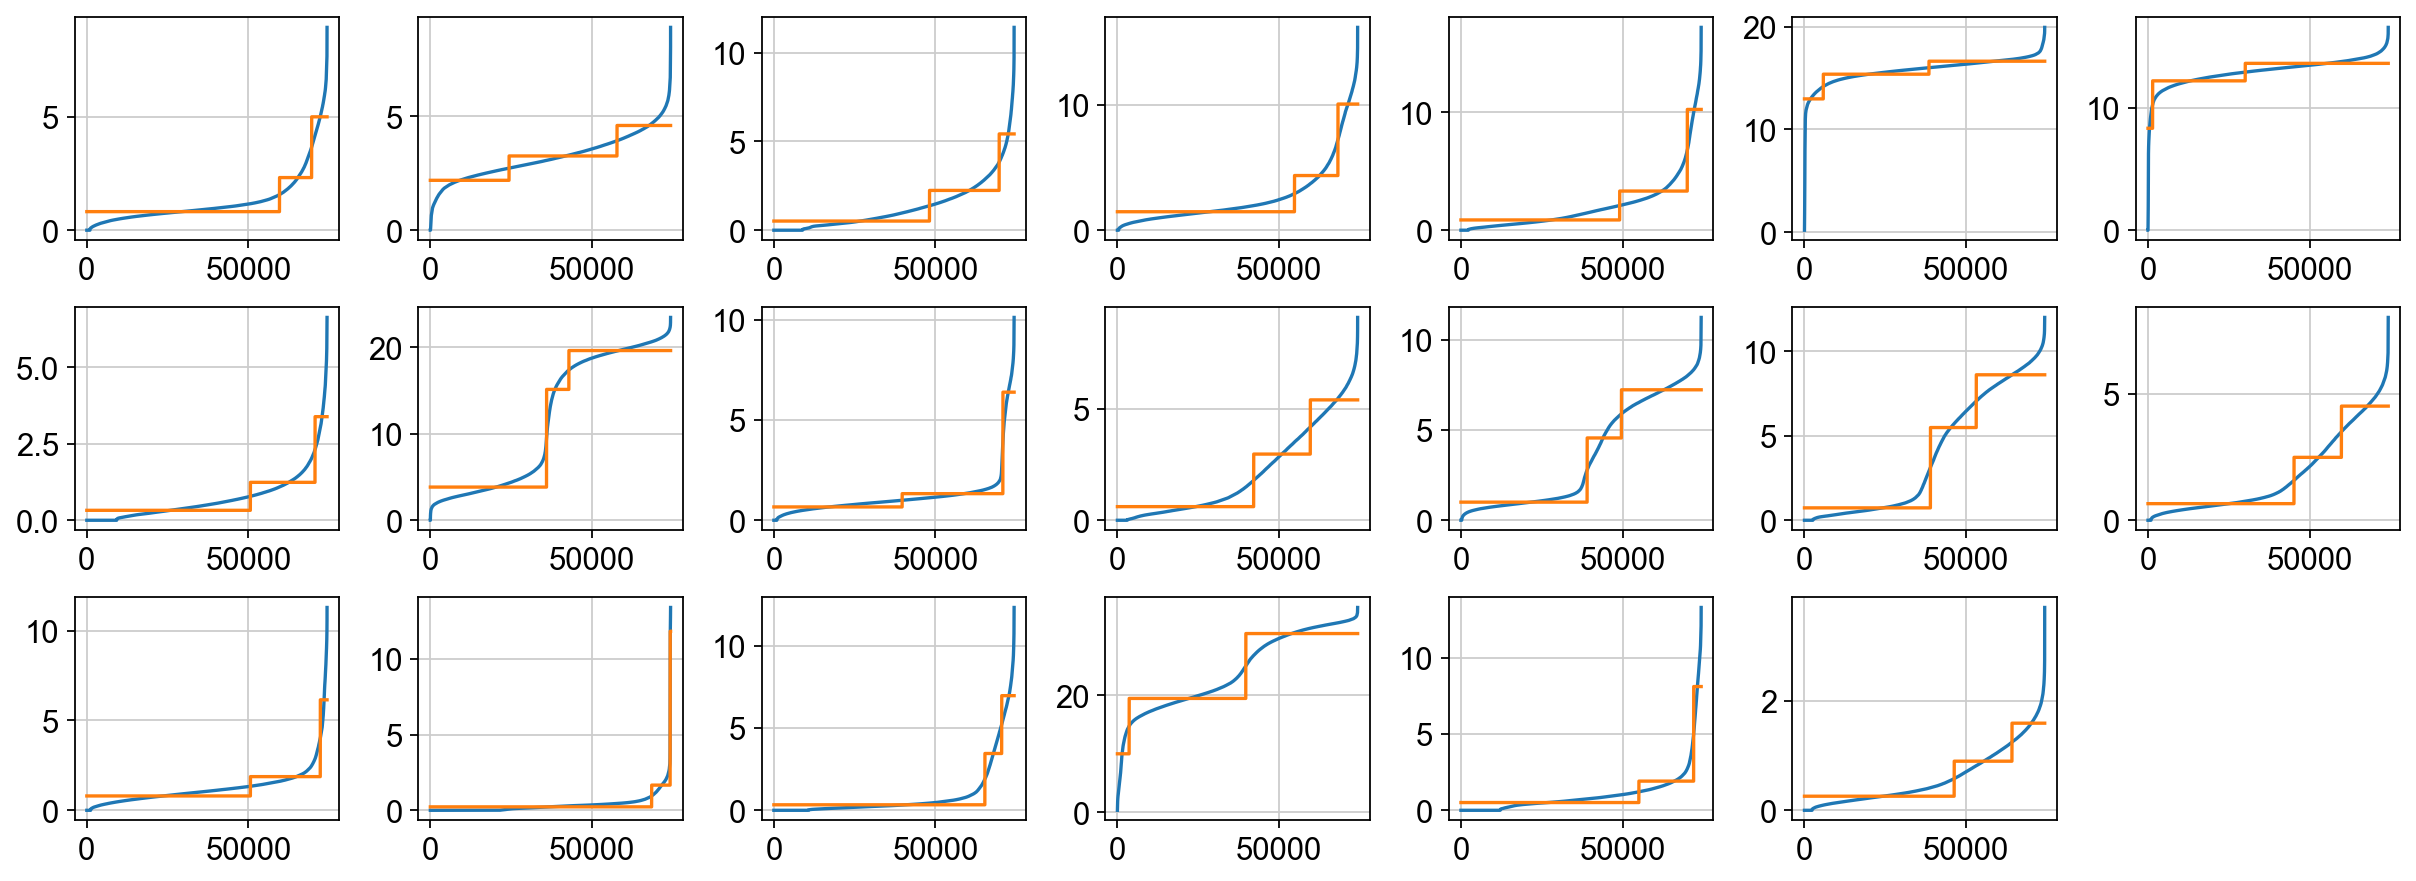

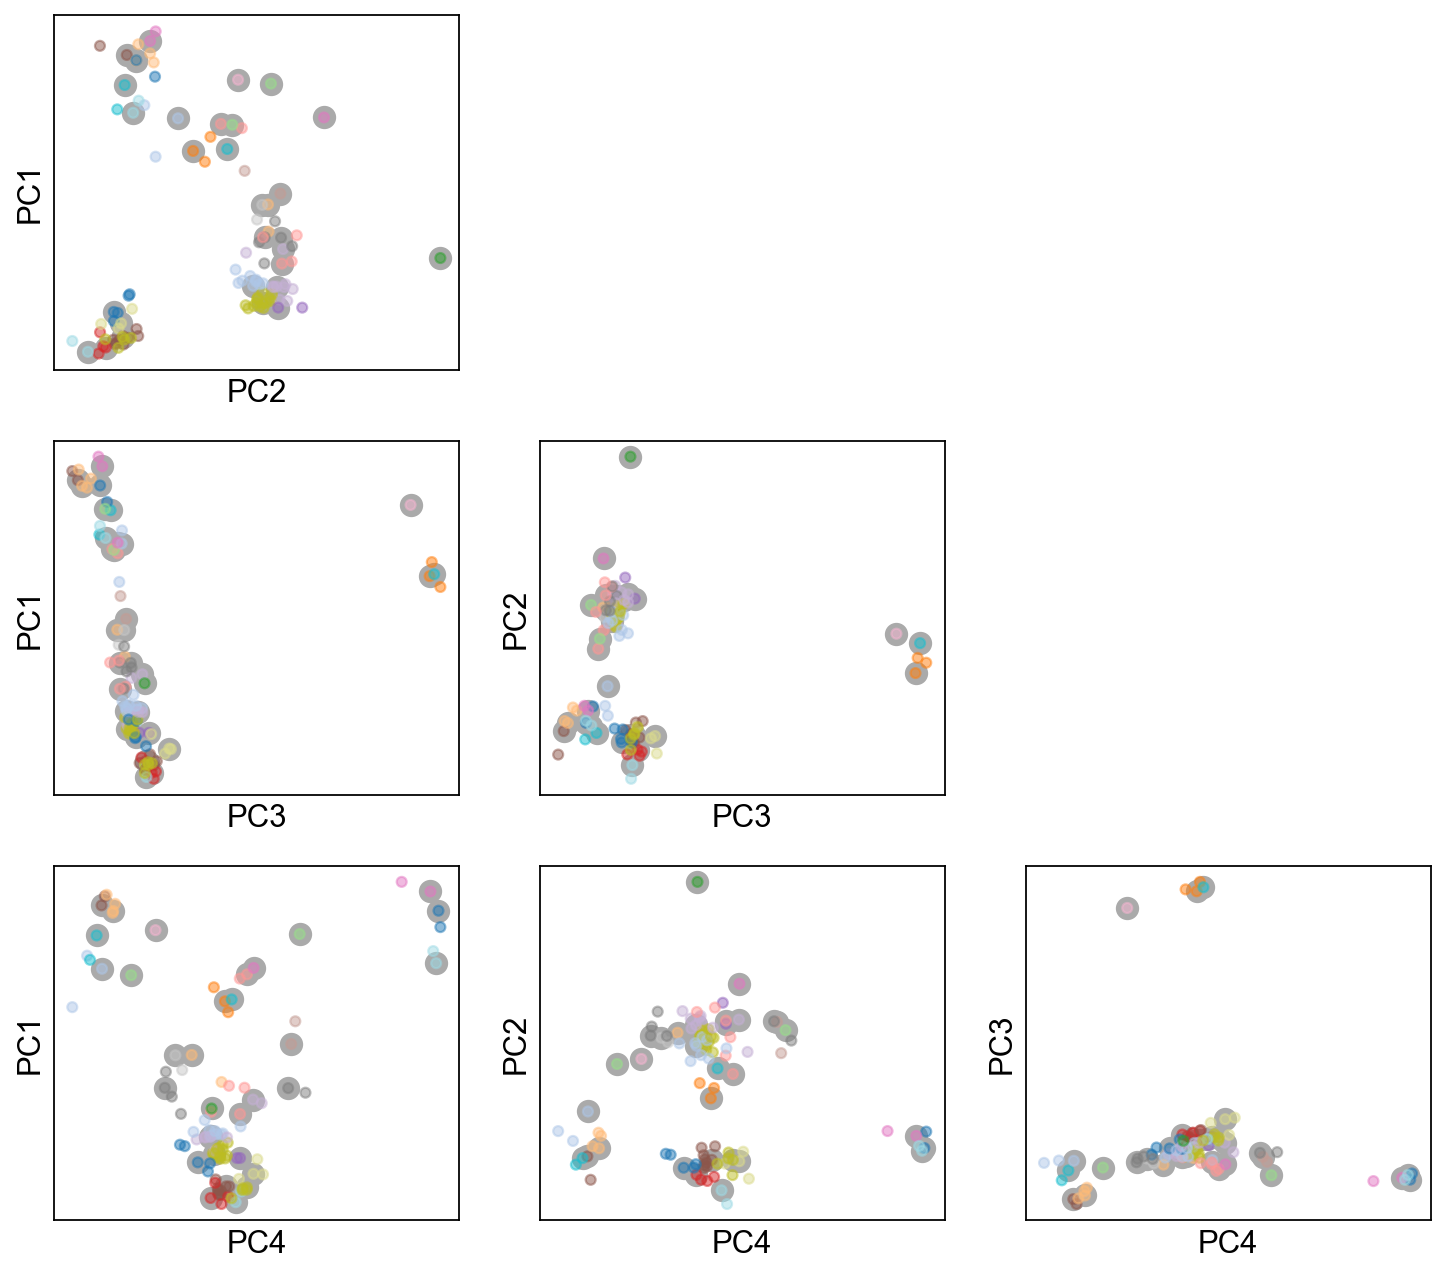

In [12]:
a.network_infer(sample_column_name='sample_batch', example_list=example_list)

### Verification the Correctness of ONMF Representation

In [ ]:
from util.plotting import onmf_gene_program_info

num_gene_show = 20
features = a.onmf_summary.components_
gene_name = cadata.var_names

onmf_gene_program_info(features, gene_name, num_gene_show, fig_folder)

#### Visualization of gene program decomposition

In [ ]:
onmf_rep_tri = a.onmf_rep_tri
features = onmf_summary.components_
num_gene_select = 10
gene_mod_ind = np.argmax(features, axis=0)

gene_mod_use = []
for ind in range(num_spin):
    ii = ind
    gene_in_mod = np.where(gene_mod_ind == ii)[0]
    cur_gene = gene_in_mod[np.argsort(- features[ii, gene_in_mod])[: num_gene_select]]
    gene_mod_use += list(cur_gene)
gene_mod_use = np.array(gene_mod_use)

np.random.seed(0)
subset_ind = np.random.choice(range(gene_matrix.shape[0]), size=10000, replace=False)
cell_order = np.argsort(KMeans(n_clusters=4).fit_predict(onmf_rep_tri[subset_ind, :]))
gene_matrix_subset = gene_matrix[subset_ind, :][:, gene_mod_use]
gene_matrix_subset /= np.max(gene_matrix, axis=0)[gene_mod_use].clip(0.2, np.inf)

sc.set_figure_params(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.imshow(gene_matrix_subset[cell_order, :].T, aspect='auto', cmap='Blues', interpolation='none')
plt.ylabel('Gene')
plt.xlabel('Cell')
plt.title('Gene expression')
plt.grid()

plt.subplot(1, 2, 2)
plt.imshow(onmf_rep_tri[subset_ind, :][cell_order, :].T, aspect='auto', cmap='Blues', interpolation='none')
plt.yticks(range(num_spin), spin_name_extend, fontsize=12)
plt.gca().yaxis.set_ticks_position('right')
plt.xlabel('Cell');
plt.title('Gene program expression')
plt.grid()

plt.savefig(fig_folder + 'gene_program_example.png', bbox_inches='tight')